# Percolation dans les modèles de lattice #




## Rapide étude des différents clusters sur un modèle de lattice

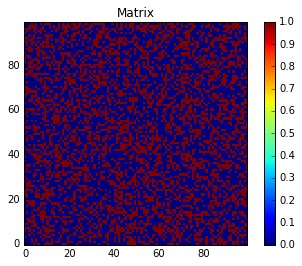

In [3]:
from pylab import *
from scipy.ndimage import measurements
%matplotlib inline

L = 100
r = rand(L,L)
p = 0.4
z = r < p
 
imshow(z, origin='lower', interpolation='nearest')
colorbar()
title("Matrix")
show()


On a construit une amtrice de nombres aléatoires $r$. Cette matrice est assimilable à notrem odèle de lattice en 2 dimensions. La variable $p$ correspond à la densité dans la lattice.
De plus, on souhaite numéroter les clusters pour pouvoir les étudier plus simplement.

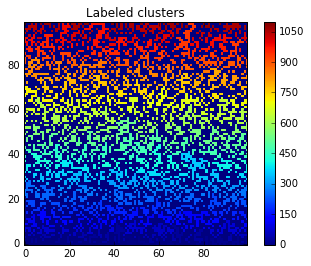

In [4]:
lw, num = measurements.label(z)
imshow(lw, origin='lower', interpolation='nearest')
colorbar()
title("Labeled clusters")
show()

L'idée est de les rendre aléatoire pour mieux visualiser, d'où le code suivant :

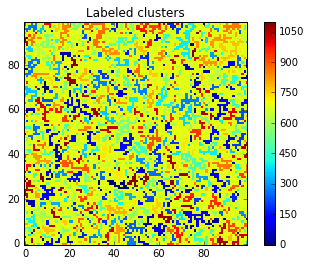

In [5]:
b = arange(lw.max() + 1)
shuffle(b)
shuffledLw = b[lw]
imshow(shuffledLw, origin='lower', interpolation='nearest')
colorbar()
title("Labeled clusters")
show()

La function measurements de python permet de tirer certaines propriétés des clusters. On peut par exemple mesurer facilement leur taille, avec le type de connexions voulues.


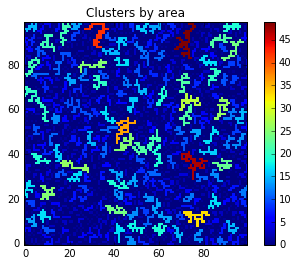

In [6]:
area = measurements.sum(z, lw, index=arange(lw.max() + 1))
areaImg = area[lw]
im3 = imshow(areaImg, origin='lower', interpolation='nearest')
colorbar()
title("Clusters by area")
show()

On souhaite à présent observer le cluster de plus grande taille. Il sera donc encadrer par une boite dans l'image suivante.

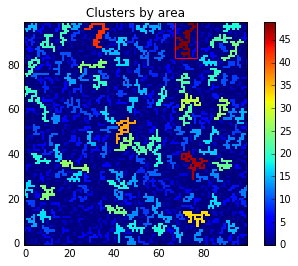

In [8]:
area = measurements.sum(z, lw, index=arange(lw.max() + 1))
areaImg = area[lw]
im3 = imshow(areaImg, origin='lower', interpolation='nearest')
colorbar()
title("Clusters by area")

sliced = measurements.find_objects(areaImg == areaImg.max())
if(len(sliced) > 0):
    sliceX = sliced[0][1]
    sliceY = sliced[0][0]
    plotxlim=im3.axes.get_xlim()
    plotylim=im3.axes.get_ylim()
    plot([sliceX.start, sliceX.start, sliceX.stop, sliceX.stop, sliceX.start], \
                      [sliceY.start, sliceY.stop, sliceY.stop, sliceY.start, sliceY.start], \
                      color="red")
    xlim(plotxlim)
    ylim(plotylim)
 
show()

Pour finir, Voici ce qui se passe pour différentes valeurs de $p$. Ainsi nous mettrons en évidence le phénomène de percolation.

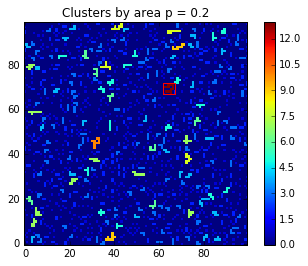

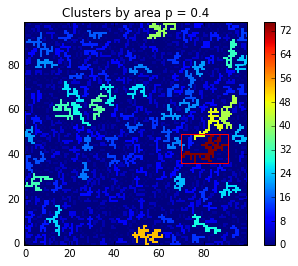

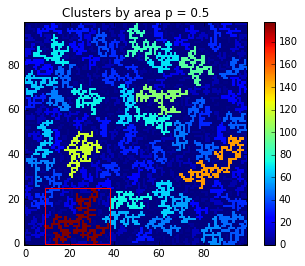

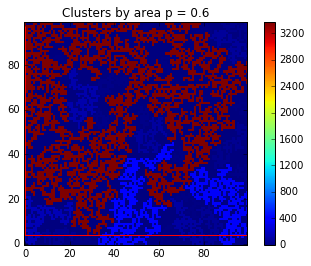

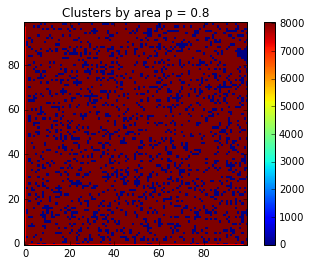

In [76]:

for i,p in enumerate([0.2,0.4,0.5,0.6,0.8]) :
    
 fig = plt.figure()
 
 r = rand(L,L)
 z = r < p
 
 lw, num = measurements.label(z)
 area = measurements.sum(z, lw, index=arange(lw.max() + 1))
 areaImg = area[lw]
 im = imshow(areaImg, origin='lower', interpolation='nearest')

 
 fig.colorbar(im)
    
 title("Clusters by area p = "+str(p))
 
 sliced = measurements.find_objects(areaImg == areaImg.max())
 if(len(sliced) > 0):
    sliceX = sliced[0][1]
    sliceY = sliced[0][0]
    plotxlim=im.axes.get_xlim()
    plotylim=im.axes.get_ylim()
    plot([sliceX.start, sliceX.start, sliceX.stop, sliceX.stop, sliceX.start], \
                      [sliceY.start, sliceY.stop, sliceY.stop, sliceY.start, sliceY.start], \
                      color="red")
    xlim(plotxlim)
    ylim(plotylim)
    

 show()


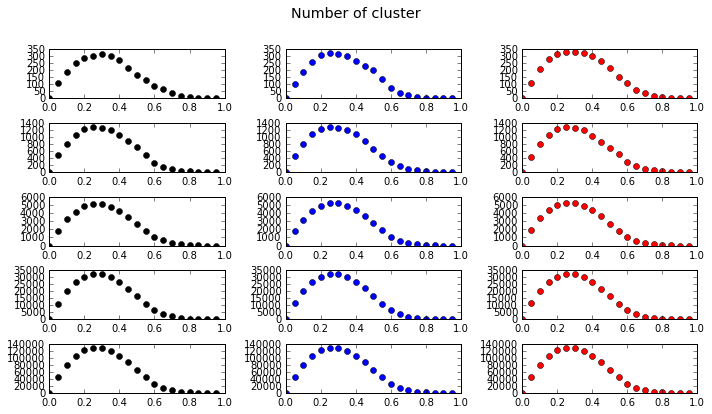

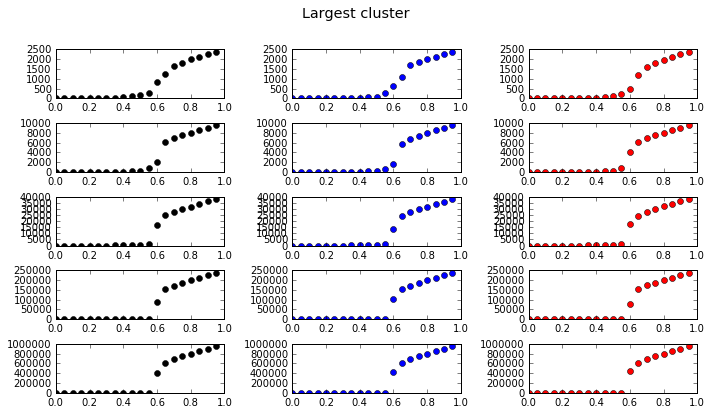

In [131]:
from pylab import *
from scipy.ndimage import measurements
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



# Set up the figures
fig1,ax1=plt.subplots(5,3,figsize=(10, 6))
ax1 = ax1.ravel()

fig2,ax2=plt.subplots(5,3,figsize=(10, 6))
ax2 = ax2.ravel()



#Set up variables
p=np.arange(0., 1., 0.05)
areamax=np.zeros(len(p))
lwmax=np.zeros(len(p))


for ind,L in enumerate([50, 100, 200, 500, 1000]): 

  for ind2,marker in enumerate(['ko', 'bo', 'ro']):
    
    # Randomise the percolation network
    r = rand(L,L)
   
    for i,p2 in enumerate(p):
      # Determine the connectivity for probability p
      z = r<p2

      lw, num = measurements.label(z)

      # Plot the clusters for given p
      
      area = measurements.sum(z, lw, index=arange(lw.max() + 1))
      areaImg = area[lw]
      lwmax[i] = lw.max()
      areamax[i] = area.max()
      # Plot the number of clusters
   
    ax2[3*ind + ind2 ].plot(p, areamax, marker)
    ax1[3*ind + ind2 ].plot(p, lwmax, marker)

      # Plot the size of the largest cluster
      #plt.figure(2)
      #plt.plot(p, area.max(), marker)
      #plt.draw()
fig1.tight_layout() 
st = fig1.suptitle('Number of cluster', fontsize="x-large")
st.set_y(0.95)
fig1.subplots_adjust(top=0.85)

fig2.tight_layout() 
st = fig2.suptitle('Largest cluster', fontsize="x-large")
st.set_y(0.95)
fig2.subplots_adjust(top=0.85)


show()

This several pictures show the behavior of the system near the percolation threshold. Before they are only small cluster and just after, infinite one.